# Open Source vs. Open Access: The Current Landscape of Scientific Research Licenses on arXiv

By Marcelo Amaral and ChatGPT, 2023

### Introduction

The COVID-19 pandemic has brought a seismic shift in our understanding of science communication. It has emphasized the critical need for immediate access to scientific findings. In light of this, we have taken a deep dive into the metadata of arXiv papers to understand how the open-access landscape has evolved over time, particularly in the fields of high energy physics and general relativity and quantum cosmology.

We started by analyzing a dataset of 217,930 papers from arXiv, focusing on the categories of 'hep-th' and 'gr-qc'. The dataset contains various metadata including the type of license under which each paper is published. Our analysis involved:

    License Distribution: Counting the number of papers for each type of license.
    Trends Over Time: Examining how the distribution of these licenses has changed yearly

### Importing Dependencies

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

### The arxiv database information

Original data file from Kaggle Oct 4, 2023 (3.9Gb,2335589 entries )

    https://www.kaggle.com/datasets/Cornell-University/arxiv/
    
    Filter by specific_categories = ['cond-mat', 'hep-ex', 'hep-lat', 'hep-ph', 'hep-th', 'gr-qc', 'math-ph', 'nucl-th', 'quant-ph', - 897360 entries

    arxiv_df = pd.read_json('filtered_arxiv_physics_data.json', lines=True)

    specific_categories = ['hep-th', 'gr-qc'] - 217930 entries

    arxiv_df = pd.read_json('filtered_arxiv_hep-th_gr-qc_data.json', lines=True)

### The gr-qc, hep-th database

In [20]:
# Load the filtered JSON file into a DataFrame
arxiv_df = pd.read_json('filtered_arxiv_hep-th_gr-qc_data.json', lines=True)
print(arxiv_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217930 entries, 0 to 217929
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id              217930 non-null  object
 1   submitter       212998 non-null  object
 2   authors         217930 non-null  object
 3   title           217930 non-null  object
 4   comments        208625 non-null  object
 5   journal-ref     134812 non-null  object
 6   doi             165966 non-null  object
 7   report-no       54974 non-null   object
 8   categories      217930 non-null  object
 9   license         138852 non-null  object
 10  abstract        217930 non-null  object
 11  versions        217930 non-null  object
 12  update_date     217930 non-null  object
 13  authors_parsed  217930 non-null  object
dtypes: object(14)
memory usage: 23.3+ MB
None


In [4]:
# Display the details of the first paper in the DataFrame
print(arxiv_df.iloc[0])

id                                                         704.0007
submitter                                         Alejandro Corichi
authors           Alejandro Corichi, Tatjana Vukasinac and Jose ...
title             Polymer Quantum Mechanics and its Continuum Limit
comments          16 pages, no figures. Typos corrected to match...
journal-ref                                Phys.Rev.D76:044016,2007
doi                                      10.1103/PhysRevD.76.044016
report-no                                              IGPG-07/03-2
categories                                                    gr-qc
license                                                        None
abstract            A rather non-standard quantum representation...
versions          [{'version': 'v1', 'created': 'Sat, 31 Mar 200...
update_date                                              2008-11-26
authors_parsed    [[Corichi, Alejandro, ], [Vukasinac, Tatjana, ...
Name: 0, dtype: object


In [5]:
# Define the author to search for
search_author = "Amaral"

# Create a mask by iterating through the 'authors_parsed' column and checking if the author is in any of the lists
mask = arxiv_df['authors_parsed'].apply(lambda x: any(search_author in ' '.join(auth) for auth in x))

# Apply the mask to get a DataFrame containing only the papers by the specific author
filtered_df = arxiv_df[mask]

print(filtered_df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 3806 to 215867
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              36 non-null     object
 1   submitter       35 non-null     object
 2   authors         36 non-null     object
 3   title           36 non-null     object
 4   comments        31 non-null     object
 5   journal-ref     26 non-null     object
 6   doi             31 non-null     object
 7   report-no       4 non-null      object
 8   categories      36 non-null     object
 9   license         21 non-null     object
 10  abstract        36 non-null     object
 11  versions        36 non-null     object
 12  update_date     36 non-null     object
 13  authors_parsed  36 non-null     object
dtypes: object(14)
memory usage: 4.2+ KB
None


In [22]:
# Display the details of the first paper in the DataFrame
print(filtered_df.iloc[21])

id                                                       2306.01964
submitter                                     Marcelo Maciel Amaral
authors              Marcelo Amaral, Richard Clawson and Klee Irwin
title             Quasicrystalline Spin Foam with Matter: Defini...
comments                                                       None
journal-ref                                                    None
doi                                                            None
report-no                                                      None
categories                                             gr-qc hep-th
license                 http://creativecommons.org/licenses/by/4.0/
abstract            In this work, we define quasicrystalline spi...
versions          [{'version': 'v1', 'created': 'Sat, 3 Jun 2023...
update_date                                              2023-06-06
authors_parsed    [[Amaral, Marcelo, ], [Clawson, Richard, ], [I...
Name: 139750, dtype: object


### Analyzing the trends in open-access vs. closed-access publications using the 'license' field

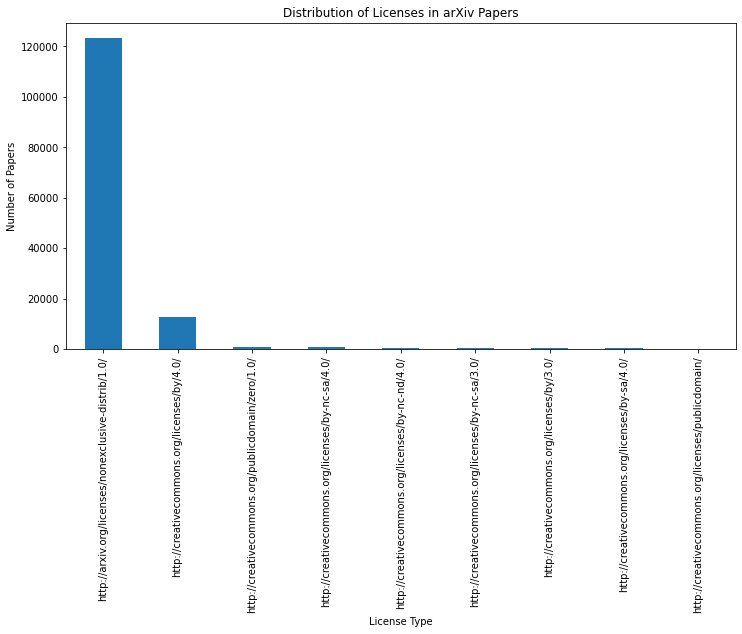

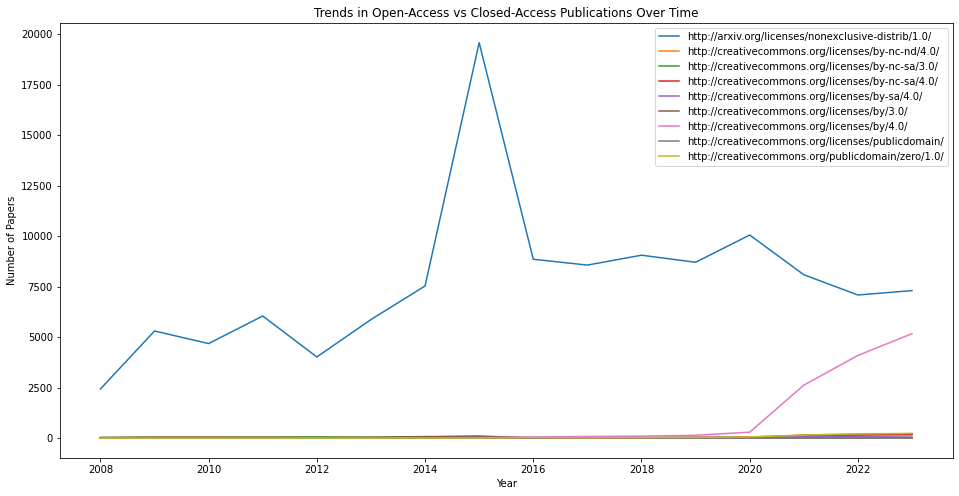

In [7]:
# Count the number of papers for each type of license
license_counts = arxiv_df['license'].value_counts()

# Plotting the distribution of licenses
plt.figure(figsize=(12, 6))
license_counts.plot(kind='bar')
plt.title('Distribution of Licenses in arXiv Papers')
plt.xlabel('License Type')
plt.ylabel('Number of Papers')
plt.show()

# To analyze trends over time, first extract the years from the update_date field
arxiv_df['year'] = pd.to_datetime(arxiv_df['update_date']).dt.year

# Now group by both year and license to see how license distribution changes over time
license_trends = arxiv_df.groupby(['year', 'license']).size().unstack().fillna(0)

# Plotting the trends over time
plt.figure(figsize=(16, 8))
for license_type in license_trends.columns:
    plt.plot(license_trends.index, license_trends[license_type], label=license_type)
    
plt.title('Trends in Open-Access vs Closed-Access Publications Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Papers')
plt.legend()
plt.show()


In [9]:
# Count the number of papers for each type of license
license_counts = arxiv_df['license'].value_counts()

# Print the counts for each type of license
print("Counts for each type of license:")
print(license_counts)


Counts for each type of license:
license
http://arxiv.org/licenses/nonexclusive-distrib/1.0/    123108
http://creativecommons.org/licenses/by/4.0/             12536
http://creativecommons.org/publicdomain/zero/1.0/         720
http://creativecommons.org/licenses/by-nc-sa/4.0/         628
http://creativecommons.org/licenses/by-nc-nd/4.0/         569
http://creativecommons.org/licenses/by-nc-sa/3.0/         413
http://creativecommons.org/licenses/by/3.0/               394
http://creativecommons.org/licenses/by-sa/4.0/            375
http://creativecommons.org/licenses/publicdomain/         109
Name: count, dtype: int64


In [21]:
# Define the list of open licenses
open_licenses = [
    'http://creativecommons.org/licenses/by/4.0/',
    'http://creativecommons.org/publicdomain/zero/1.0/',
    'http://creativecommons.org/licenses/by/3.0/',
    'http://creativecommons.org/licenses/publicdomain/'
]

# Filter the DataFrame to only include papers with the specified licenses
filtered_df = arxiv_df[arxiv_df['license'].isin(open_licenses)]

print(filtered_df.info())

# Save the filtered DataFrame to a JSON file
filtered_df.to_json('filtered_open_license_arxiv_hep-th_gr-qc_papers.json', orient='records', lines=True)

<class 'pandas.core.frame.DataFrame'>
Index: 13759 entries, 2220 to 216027
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              13759 non-null  object
 1   submitter       13759 non-null  object
 2   authors         13759 non-null  object
 3   title           13759 non-null  object
 4   comments        12644 non-null  object
 5   journal-ref     4734 non-null   object
 6   doi             8532 non-null   object
 7   report-no       1726 non-null   object
 8   categories      13759 non-null  object
 9   license         13759 non-null  object
 10  abstract        13759 non-null  object
 11  versions        13759 non-null  object
 12  update_date     13759 non-null  object
 13  authors_parsed  13759 non-null  object
dtypes: object(14)
memory usage: 1.6+ MB
None


### Number of papers by year

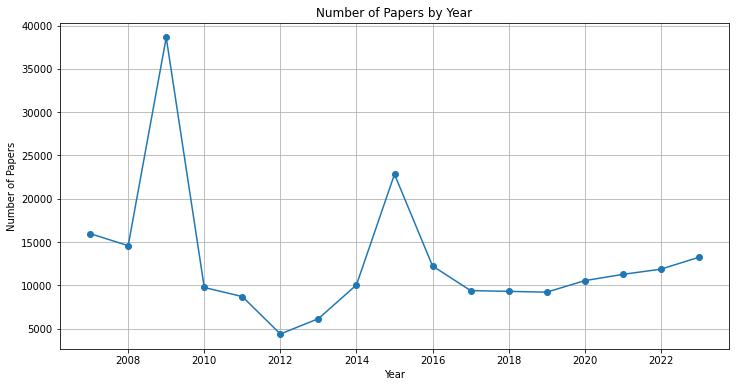

In [10]:
# Count the number of papers by year
papers_by_year = arxiv_df['year'].value_counts().sort_index()

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(papers_by_year.index, papers_by_year.values, marker='o')
plt.title('Number of Papers by Year')
plt.xlabel('Year')
plt.ylabel('Number of Papers')
plt.grid(True)
plt.show()


### Papers with no license

In [11]:
# Count the number of papers with no license specified
no_license_count = arxiv_df['license'].isnull().sum()

# Group the DataFrame by year, and then count the number of papers with no license for each year
no_license_by_year = arxiv_df[arxiv_df['license'].isnull()].groupby('year').size()

# Display the counts
print(f"Total number of papers with no license: {no_license_count}")
print(f"Number of papers with no license by year: \n{no_license_by_year}")


Total number of papers with no license: 79078
Number of papers with no license by year: 
year
2007    15962
2008    12083
2009    33230
2010     4967
2011     2549
2012      260
2013      187
2014     2361
2015     3012
2016     3253
2017      681
2018       80
2019      263
2020       46
2021       40
2022       71
2023       33
dtype: int64


In [12]:
# Filter the DataFrame to only include papers with no license
no_license_df = arxiv_df[arxiv_df['license'].isnull()]

# Display the details of the first paper with no license
print(no_license_df.iloc[0])


id                                                         704.0007
submitter                                         Alejandro Corichi
authors           Alejandro Corichi, Tatjana Vukasinac and Jose ...
title             Polymer Quantum Mechanics and its Continuum Limit
comments          16 pages, no figures. Typos corrected to match...
journal-ref                                Phys.Rev.D76:044016,2007
doi                                      10.1103/PhysRevD.76.044016
report-no                                              IGPG-07/03-2
categories                                                    gr-qc
license                                                        None
abstract            A rather non-standard quantum representation...
versions          [{'version': 'v1', 'created': 'Sat, 31 Mar 200...
update_date                                              2008-11-26
authors_parsed    [[Corichi, Alejandro, ], [Vukasinac, Tatjana, ...
year                                            

The revision history for the paper 704.0007 for example
    
    https://arxiv.org/licenses/assumed-1991-2003/license.html
    1991-08-14 - First submission to arXiv (then just hep-th) made (hep-th/9108001)
    2007-06-21 - This HTML page created
    2008-12-16 - Add URI for this license explicitly
    
Prior to January 2004, there was no explicit license granting/certification as part of the arXiv.org (formerly xxx.lanl.gov) e-print archive submission process. It was assumed that by the intentional action of submission and help pages stating the policies of archival availability of submissions, a license equivalent to http://arxiv.org/licenses/nonexclusive-distrib/1.0/ was granted by the act of submission.

So the field is none as many others, because people could submit without choosing the license and it is assumed the one above. And many papers have the 2008 data probablly because of some automatic update that year?


### Including papers without license in the counting of the arxive default license

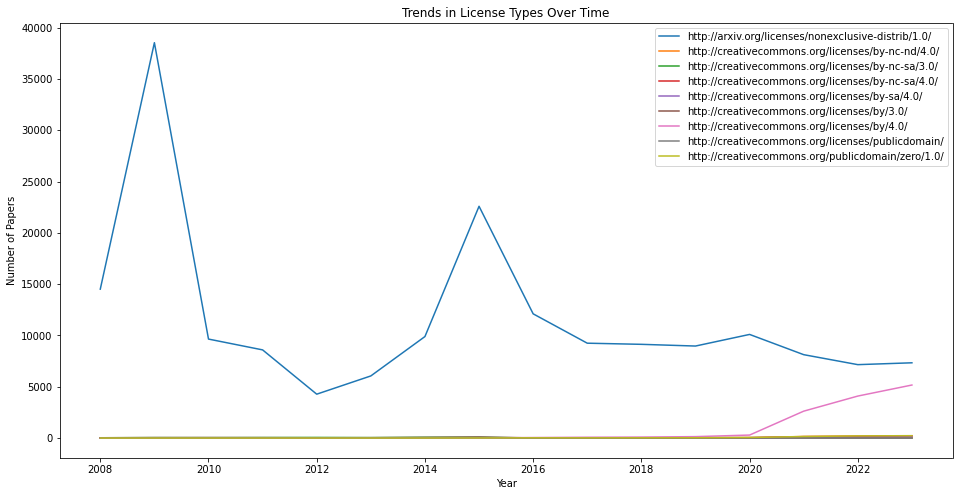

In [13]:
# Group by year and license, but don't fill NaN yet
license_trends = arxiv_df.groupby(['year', 'license']).size().unstack()

# Count the number of papers with no license specified by year
no_license_by_year = arxiv_df[arxiv_df['license'].isnull()].groupby('year').size()

# Add the 'no_license_by_year' counts to 'http://arxiv.org/licenses/nonexclusive-distrib/1.0/'
license_trends['http://arxiv.org/licenses/nonexclusive-distrib/1.0/'] = license_trends['http://arxiv.org/licenses/nonexclusive-distrib/1.0/'].add(no_license_by_year, fill_value=0)

# Now fill NaN values with 0
license_trends.fillna(0, inplace=True)

# Plotting
plt.figure(figsize=(16, 8))
for license_type in license_trends.columns:
    plt.plot(license_trends.index, license_trends[license_type], label=license_type)

plt.title('Trends in License Types Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Papers')
plt.legend()
plt.show()


### Compare with the full arxiv dataset

1. Sample Code for Reading Data in Chunks (Optional)

Reading in chunks is helpful when dealing with large datasets. Here is how you can read your large JSON file in chunks:

In [14]:
chunk_list = []
for chunk in pd.read_json('arxiv-metadata-oai-snapshot.json', lines=True, chunksize=10000):
    # Filter and append to list
    chunk_list.append(chunk)
    
# Combine chunks back into single dataframe
arxiv_df = pd.concat(chunk_list, axis=0)


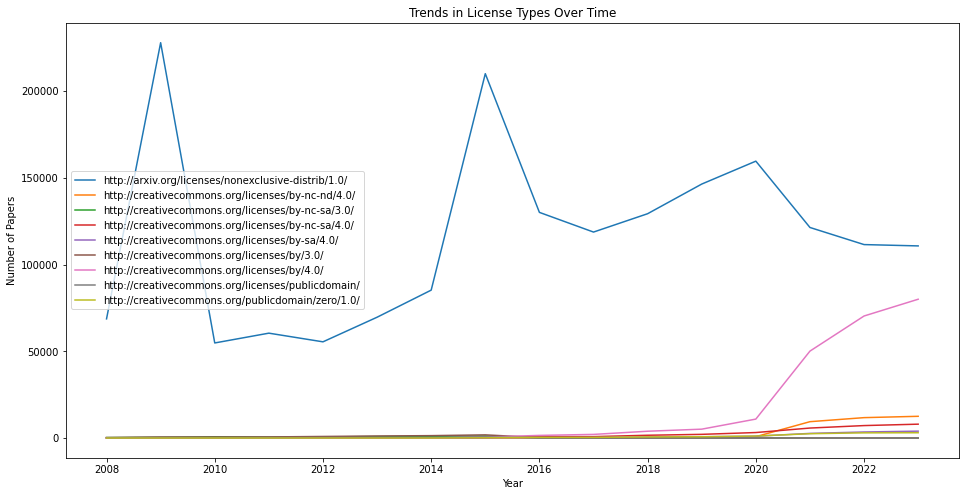

In [15]:
# To analyze trends over time, first extract the years from the update_date field
arxiv_df['year'] = pd.to_datetime(arxiv_df['update_date']).dt.year

# Group by year and license, but don't fill NaN yet
license_trends = arxiv_df.groupby(['year', 'license']).size().unstack()

# Count the number of papers with no license specified by year
no_license_by_year = arxiv_df[arxiv_df['license'].isnull()].groupby('year').size()

# Add the 'no_license_by_year' counts to 'http://arxiv.org/licenses/nonexclusive-distrib/1.0/'
license_trends['http://arxiv.org/licenses/nonexclusive-distrib/1.0/'] = license_trends['http://arxiv.org/licenses/nonexclusive-distrib/1.0/'].add(no_license_by_year, fill_value=0)

# Now fill NaN values with 0
license_trends.fillna(0, inplace=True)

# Plotting
plt.figure(figsize=(16, 8))
for license_type in license_trends.columns:
    plt.plot(license_trends.index, license_trends[license_type], label=license_type)

plt.title('Trends in License Types Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Papers')
plt.legend()
plt.show()

We observed that the trend in hep-th and gr-qc essentially follows the general trend across arXiv.

In [16]:
# Count the number of papers for each type of license
license_counts = arxiv_df['license'].value_counts()

# Print the counts for each type of license
print("Counts for each type of license:")
print(license_counts)

Counts for each type of license:
license
http://arxiv.org/licenses/nonexclusive-distrib/1.0/    1552551
http://creativecommons.org/licenses/by/4.0/             224540
http://creativecommons.org/licenses/by-nc-nd/4.0/        34480
http://creativecommons.org/licenses/by-nc-sa/4.0/        29813
http://creativecommons.org/licenses/by-sa/4.0/           13137
http://creativecommons.org/publicdomain/zero/1.0/        11973
http://creativecommons.org/licenses/by/3.0/               7917
http://creativecommons.org/licenses/by-nc-sa/3.0/         5876
http://creativecommons.org/licenses/publicdomain/         2475
Name: count, dtype: int64


The ability to use a full PDF in a third part website and to embed it in vector databases for user search largely depends on the specific terms of the license under which the paper is published. Here's a general overview of what each of the mentioned licenses usually allows:

    Non-Exclusive Distribution License (arXiv's default): This is generally a permissive license but is not as explicit as Creative Commons licenses about what you can and cannot do. You'll likely need to refer to arXiv's terms of service for specifics.

    Creative Commons BY 4.0: This license allows you to distribute, remix, adapt, and build upon the material, even commercially, as long as you provide appropriate credit to the original author(s).

    Creative Commons BY-NC-ND 4.0: This license allows you to share the work, but not to modify it in any way or use it for commercial purposes.

    Creative Commons BY-NC-SA 4.0: This license allows you to remix, adapt, and build upon the material non-commercially, and although your new works must also acknowledge the original author(s) and be non-commercial, you don’t have to license your derivative works on the same terms.

    Creative Commons BY-SA 4.0: Similar to BY 4.0 but all derivative works must be shared with the same license.

    Creative Commons Public Domain Zero 1.0: This license allows you to use the material for any purpose without any conditions, unless such conditions are required by law.

    Creative Commons BY 3.0, BY-NC-SA 3.0, Public Domain: These are older versions of the above licenses, with similar terms.

The most permissive licenses would be Creative Commons BY 4.0 and Creative Commons Public Domain Zero 1.0 (and their old versions: Creative Commons BY 3.0, Public Domain).

In [18]:
# Define the list of open licenses
open_licenses = [
    'http://creativecommons.org/licenses/by/4.0/',
    'http://creativecommons.org/publicdomain/zero/1.0/',
    'http://creativecommons.org/licenses/by/3.0/',
    'http://creativecommons.org/licenses/publicdomain/'
]

# Filter the DataFrame to only include papers with the specified licenses
filtered_df = arxiv_df[arxiv_df['license'].isin(open_licenses)]

print(filtered_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 246905 entries, 3394 to 2326789
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id              246905 non-null  object
 1   submitter       246904 non-null  object
 2   authors         246905 non-null  object
 3   title           246905 non-null  object
 4   comments        162096 non-null  object
 5   journal-ref     47489 non-null   object
 6   doi             80481 non-null   object
 7   report-no       9262 non-null    object
 8   categories      246905 non-null  object
 9   license         246905 non-null  object
 10  abstract        246905 non-null  object
 11  versions        246905 non-null  object
 12  update_date     246905 non-null  object
 13  authors_parsed  246905 non-null  object
 14  year            246905 non-null  int32 
dtypes: int32(1), object(14)
memory usage: 29.2+ MB
None


In [19]:
# Save the filtered DataFrame to a JSON file
filtered_df.to_json('filtered_open_license_arxiv_papers.json', orient='records', lines=True)